#Ambientação do notebook

In [164]:
!pip install -U -q PyDrive

In [165]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

In [166]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [167]:
downloaded = drive.CreateFile({'id': '1-C4iOW6z7oAtWCHhwuC-IeTxp8COwbxj'})
downloaded.GetContentFile('client.csv')

In [168]:
client = pd.read_csv('client.csv')

#Comparação de features em relação ao índice de novo cliente

In [169]:
matriz_corr = client.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
Unnamed: 0,1.000000,-0.001449,0.001522,-0.002444,-0.000885,0.002616,-0.000890,-0.000765,-0.004190,0.003100,-0.000362,-0.002664,0.002035
vlr_credito,-0.001449,1.000000,0.280953,0.006309,0.071460,0.096261,0.009918,0.398583,0.019903,0.098304,0.593851,0.011959,0.070471
vlr_saldo,0.001522,0.280953,1.000000,0.000226,0.074541,0.235828,0.002335,0.088389,0.018893,0.007249,0.160302,0.017218,0.170425
num_atend_atrs,-0.002444,0.006309,0.000226,1.000000,0.001361,0.032058,0.531965,0.019272,-0.000354,0.002933,0.006910,0.021113,0.021248
vlr_score,-0.000885,0.071460,0.074541,0.001361,1.000000,0.076976,0.006721,0.094354,0.002783,-0.293389,0.078622,0.004139,0.066338
num_produtos,0.002616,0.096261,0.235828,0.032058,0.076976,1.000000,0.052517,0.399924,0.000552,0.001635,0.071313,0.007039,0.707495
num_atend,-0.000890,0.009918,0.002335,0.531965,0.006721,0.052517,1.000000,0.028077,-0.000586,0.000265,0.014571,0.011490,0.030704
qtd_oper,-0.000765,0.398583,0.088389,0.019272,0.094354,0.399924,0.028077,1.000000,0.008165,0.151486,0.299594,0.005816,0.296881
qtd_reclm,-0.004190,0.019903,0.018893,-0.000354,0.002783,0.000552,-0.000586,0.008165,1.000000,-0.001011,0.017440,0.537171,0.005056
qtd_restr,0.003100,0.098304,0.007249,0.002933,-0.293389,0.001635,0.000265,0.151486,-0.001011,1.000000,0.053812,-0.001945,0.002315


In [170]:
target_corr = matriz_corr.data.ind_atrito
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,ind_atrito
ind_atrito,1.000000
qtd_reclm,0.537171
num_atend_atrs,0.021113
vlr_saldo,0.017218
vlr_renda,0.012472
vlr_credito,0.011959
num_atend,0.011490
num_produtos,0.007039
ind_engaj,0.006447
qtd_oper,0.005816


#Cliente atritado

##Undersampling de não atritados

In [171]:
import pandas as pd
import numpy as np

cliente_atrito = client[client.ind_atrito == 1]
cliente_atrito

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
92,5135,0.013596,0.006807,0.0,0.894196,0.034483,0.0,0.083019,1.0,0.000000,0.018892,1.0,1.0
4087,259785,0.011070,0.005048,0.0,0.350471,0.011494,0.0,0.026415,0.0,0.000000,0.003612,1.0,0.0
5715,356685,0.035036,0.007745,0.0,0.308646,0.011494,0.0,0.018868,0.0,0.036697,0.026948,1.0,0.0
5753,361057,0.064191,0.031470,0.0,1.117262,0.022989,0.0,0.052830,1.0,0.000000,0.110432,1.0,1.0
7637,480701,0.052269,0.009075,0.0,0.636275,0.011494,0.0,0.052830,0.0,0.000000,0.111821,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173376,11067489,0.022855,0.006331,0.0,0.489887,0.034483,0.0,0.071698,0.0,0.000000,0.024726,1.0,1.0
176941,11288368,0.008752,0.004898,0.0,0.434121,0.011494,0.0,0.083019,1.0,0.018349,0.011529,1.0,0.0
178649,11400484,0.011876,0.004694,0.0,0.692042,0.011494,0.0,0.060377,0.0,0.000000,0.003195,1.0,0.0
184201,11774201,0.008256,0.008337,0.0,0.768721,0.011494,0.0,0.049057,0.0,0.000000,0.009446,1.0,0.0


In [172]:
cliente_not_atrito = client[client.ind_atrito == 0]
cliente_not_atrito

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
0,0,0.001802,0.001837,0.0,0.489887,0.000000,0.0,0.030189,0.0,0.055046,0.003889,0.0,0.0
1,18,0.000432,0.000086,0.0,-1.685013,0.000000,0.0,0.011321,0.0,0.009174,0.002361,0.0,0.0
2,30,0.002952,0.001706,0.0,-0.290846,0.011494,0.0,0.045283,0.0,0.036697,0.005001,0.0,0.0
3,35,0.000083,0.001889,0.0,0.190142,0.000000,0.0,0.022642,0.0,0.009174,0.011529,0.0,0.0
4,85,0.014023,0.000945,0.0,-0.402379,0.000000,0.0,0.116981,0.0,0.027523,0.011113,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185875,11886194,0.002807,0.006070,0.0,-0.221138,0.000000,0.0,0.041509,0.0,0.055046,0.002917,0.0,0.0
185876,11886221,0.027062,0.005580,0.0,1.389125,0.068966,0.0,0.116981,0.0,0.000000,0.008057,0.0,1.0
185877,11886229,0.007014,0.028666,0.0,1.082408,0.045977,0.0,0.026415,0.0,0.000000,0.002084,0.0,1.0
185878,11886303,0.000587,0.001349,0.0,-0.667271,0.000000,0.0,0.033962,0.0,0.009174,0.009168,0.0,0.0


In [173]:
cliente_not_atrito_sample = cliente_not_atrito.sample(frac=.01, random_state=42)
cliente_not_atrito_sample

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
153043,9763395,0.000836,0.003676,0.0,-0.151429,0.011494,0.0,0.011321,0.0,0.027523,0.003334,0.0,0.0
116148,7405981,0.111865,0.002720,0.0,0.406237,0.000000,0.0,0.162264,0.0,0.018349,0.181553,0.0,0.0
4832,305548,0.002696,0.000208,0.0,0.155287,0.000000,0.0,0.037736,0.0,0.000000,0.004167,0.0,0.0
129787,8278816,0.000900,0.001012,0.0,-0.207196,0.045977,0.0,0.071698,0.0,0.000000,0.002084,0.0,1.0
104167,6626067,0.041504,0.000405,0.0,3.403696,0.000000,0.0,0.143396,0.0,0.000000,0.011390,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1386558,0.010020,0.010504,0.0,-1.685013,0.091954,0.0,0.116981,0.0,0.100917,0.009029,0.0,1.0
4234,268802,0.001786,0.004035,0.0,1.012700,0.000000,0.0,0.037736,0.0,0.000000,0.009029,0.0,0.0
81646,5173032,0.003785,0.001600,0.0,-1.719867,0.022989,0.0,0.071698,0.0,0.045872,0.002084,0.0,1.0
45289,2845346,0.003228,0.004529,0.0,-1.608333,0.022989,0.0,0.060377,0.0,0.073394,0.002917,0.0,1.0


In [174]:
client = pd.concat([cliente_atrito, cliente_not_atrito_sample]) 
client

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
92,5135,0.013596,0.006807,0.0,0.894196,0.034483,0.0,0.083019,1.0,0.000000,0.018892,1.0,1.0
4087,259785,0.011070,0.005048,0.0,0.350471,0.011494,0.0,0.026415,0.0,0.000000,0.003612,1.0,0.0
5715,356685,0.035036,0.007745,0.0,0.308646,0.011494,0.0,0.018868,0.0,0.036697,0.026948,1.0,0.0
5753,361057,0.064191,0.031470,0.0,1.117262,0.022989,0.0,0.052830,1.0,0.000000,0.110432,1.0,1.0
7637,480701,0.052269,0.009075,0.0,0.636275,0.011494,0.0,0.052830,0.0,0.000000,0.111821,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1386558,0.010020,0.010504,0.0,-1.685013,0.091954,0.0,0.116981,0.0,0.100917,0.009029,0.0,1.0
4234,268802,0.001786,0.004035,0.0,1.012700,0.000000,0.0,0.037736,0.0,0.000000,0.009029,0.0,0.0
81646,5173032,0.003785,0.001600,0.0,-1.719867,0.022989,0.0,0.071698,0.0,0.045872,0.002084,0.0,1.0
45289,2845346,0.003228,0.004529,0.0,-1.608333,0.022989,0.0,0.060377,0.0,0.073394,0.002917,0.0,1.0


##Treinamento Teste

In [175]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

cols = ['vlr_saldo','vlr_credito', 'num_atend_atrs', 'qtd_reclm','vlr_renda']

# Dividindo x e y
x = client[cols]
y = client['ind_atrito']

print(y.shape, y[y==1].shape)


sm = SMOTE(random_state=42, sampling_strategy="auto")
X_res, y_res = sm.fit_resample(x, y)

print(y_res.shape, y_res[y_res==0].shape, y_res[y_res==1].shape)

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

(1955,) (97,)
(3716,) (1858,) (1858,)


##Oversampling de atritados

In [176]:
x_train.shape
y_train.shape

(2972,)

In [177]:
x_train.shape
y_train.shape

(2972,)

##KNN 

In [178]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=3)
kn_n.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [179]:
y_pred_knn = kn_n.predict(x_test)
y_pred_knn

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

###Métricas

In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.8494623655913979

In [181]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn)

0.784841075794621

In [182]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn)

0.9304347826086956

###Matriz de confusão

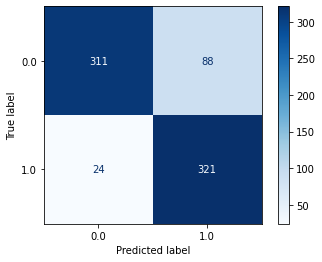

In [183]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##Árvore de decisão

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [185]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.

###Metricas

Acuracia

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

0.853494623655914

Precisão

In [187]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

0.8314606741573034

Recall

In [188]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

0.8579710144927536

###Matriz de confusão

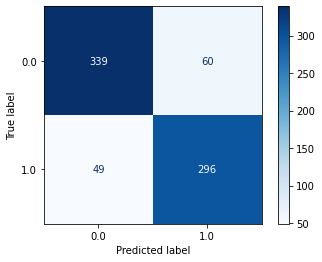

In [189]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##SVM

In [190]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
clf

SVC()

In [191]:
y_pred_clf =clf.predict(x_test)

In [192]:
y_pred_clf

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

### Metricas

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_clf)

0.7016129032258065

In [194]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_clf)

0.9361702127659575

In [195]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_clf)

0.3826086956521739

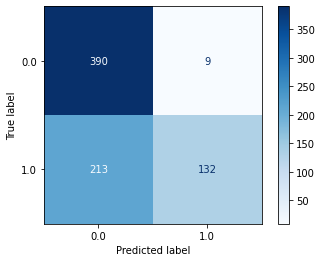

In [196]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clf,x_test,y_test, cmap='Blues')

##Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [198]:
y_pred_rdf = rdf.predict(x_test)

###Metricas

Acuracia

In [199]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

0.8978494623655914

Precisão

In [200]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

0.8725761772853186

Recall

In [201]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

0.9130434782608695

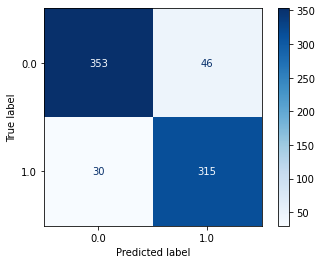

In [202]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(x_train, y_train)

GaussianNB()

In [204]:
y_pred_nbs = rdf.predict(x_test)

###Metricas

Acuracia

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_nbs)

0.8978494623655914

Precisão

In [206]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_nbs)

0.8725761772853186

Recall

In [207]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_nbs)

0.9130434782608695

###Matriz de confusão

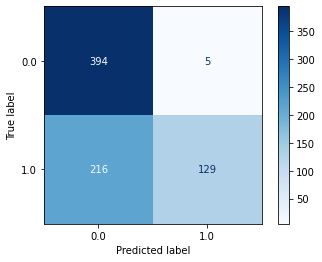

In [208]:
plot_confusion_matrix(nbs,x_test,y_test, cmap='Blues')

##Regressão logistica

In [209]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train)

In [210]:
y_pred_rgl = rgl.predict(x_test)

###Metricas

Acuracia

In [211]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl)

0.6989247311827957

Presizão

In [212]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl)

0.991869918699187

Recall

In [213]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl)

0.3536231884057971

###Matriz de confusão

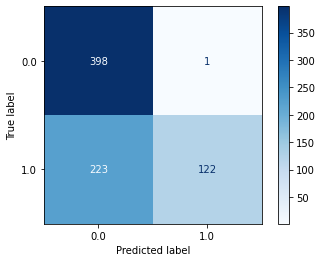

In [214]:
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues')

#Hiperparâmetros

#Árvore de decisão

##Árvore de Decisão parâmetro 1 

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [216]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.

###Métricas 

In [217]:
#Importando bibliotecas necessárias
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

Acurácia

In [218]:
accuracy_score(y_test, y_pred_avd)

0.853494623655914

Precisão

In [219]:
precision_score(y_test, y_pred_avd)

0.8314606741573034

Recall

In [220]:
recall_score(y_test, y_pred_avd)

0.8579710144927536

Matriz de Confusão

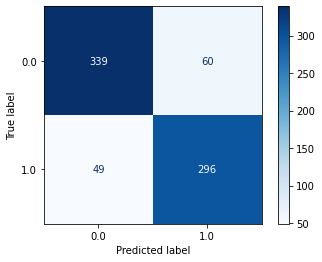

In [221]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##Árvore de Decisão parâmetro 2

In [222]:
avd = DecisionTreeClassifier(criterion='gini', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [223]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0.

###Métricas

Acurácia

In [224]:
accuracy_score(y_test, y_pred_avd)

0.8655913978494624

Precisão

In [225]:
precision_score(y_test, y_pred_avd)

0.8356164383561644

Recall

In [226]:
recall_score(y_test, y_pred_avd)

0.8840579710144928

Matriz de Confusão

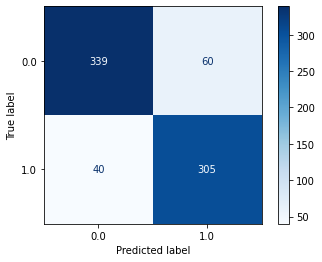

In [227]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##Árvore de Decisão parâmetro 3

In [228]:
avd = DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=42)

In [229]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [230]:
accuracy_score(y_test, y_pred_avd)

0.8279569892473119

Precisão 

In [231]:
precision_score(y_test, y_pred_avd)

0.7877984084880637

Recall

In [232]:
recall_score(y_test, y_pred_avd)

0.8608695652173913

Matriz de Confusão

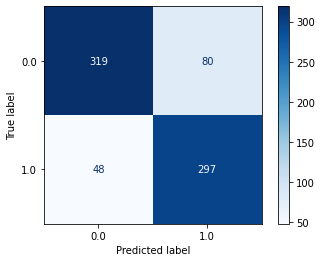

In [233]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##Árvore de Decisão parâmetro 4

In [234]:
avd = DecisionTreeClassifier(criterion='entropy',max_features='log2', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [235]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [236]:
accuracy_score(y_test, y_pred_avd)

0.8279569892473119

Precisão

In [237]:
precision_score(y_test, y_pred_avd)

0.7877984084880637

Recall

In [238]:
recall_score(y_test, y_pred_avd)

0.8608695652173913

Matriz de Confusão

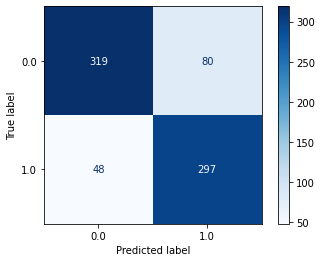

In [239]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##Árvore de Decisão parâmetro 5

In [240]:
avd = DecisionTreeClassifier(criterion='entropy',max_features='sqrt', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [241]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

###Métricas

Precisão

In [242]:
accuracy_score(y_test, y_pred_avd)

0.8279569892473119

Precisão

In [243]:
precision_score(y_test, y_pred_avd)

0.7877984084880637

Recall

In [244]:
recall_score(y_test, y_pred_avd)

0.8608695652173913

Matriz de Confusão

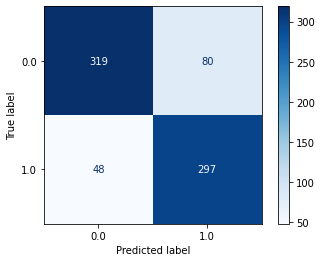

In [245]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

#KNN

##KNN parâmetro 1

In [246]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=10,
                            weights='uniform')
kn_n.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [247]:
y_prev_knn = kn_n.predict(x_test)
y_prev_knn

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [248]:
accuracy_score(y_test, y_prev_knn)

0.8239247311827957

Precisão 

In [249]:
precision_score(y_test, y_prev_knn)

0.7523584905660378

Recall

In [250]:
recall_score(y_test, y_prev_knn)

0.9246376811594202

Matriz de Confusão

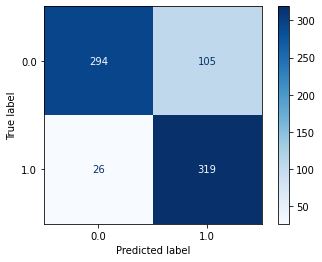

In [251]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##KNN parâmetro 2

In [252]:
kn_n = KNeighborsClassifier(n_neighbors=10,
                            weights='distance')
kn_n.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [253]:
y_prev_knn = kn_n.predict(x_test)
y_prev_knn

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0.

### Métricas

Acurácia

In [254]:
accuracy_score(y_test, y_prev_knn)

0.8360215053763441

Precisão 

In [255]:
precision_score(y_test, y_prev_knn)

0.7551487414187643

Recall

In [256]:
recall_score(y_test, y_prev_knn)

0.9565217391304348

Matriz de Confusão

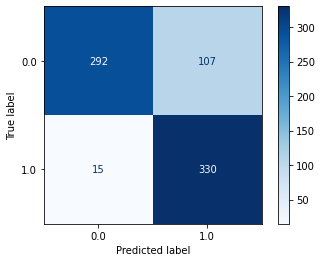

In [257]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##KNN parâmetro 3

In [258]:
kn_n = KNeighborsClassifier(leaf_size=30,
                            algorithm='ball_tree')
kn_n.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [259]:
y_prev_knn = kn_n.predict(x_test)
y_prev_knn

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

###Métricas

Acurácia

In [260]:
accuracy_score(y_test, y_prev_knn)

0.831989247311828

Precisão

In [261]:
precision_score(y_test, y_prev_knn)

0.7606635071090048

Recall

In [262]:
recall_score(y_test, y_prev_knn)

0.9304347826086956

Matriz de Confusão

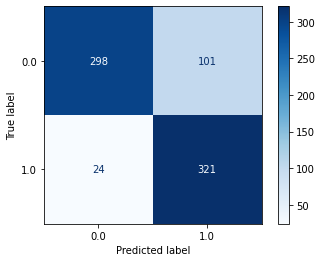

In [263]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##KNN parametro 4

In [264]:
kn_n = KNeighborsClassifier(leaf_size=30,
                            algorithm='kd_tree')
kn_n.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [265]:
y_prev_knn = kn_n.predict(x_test)
y_prev_knn

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

###Métricas

Acurácia

In [266]:
accuracy_score(y_test, y_prev_knn)

0.831989247311828

Precisão

In [267]:
precision_score(y_test, y_prev_knn)

0.7606635071090048

Recall

In [268]:
recall_score(y_test, y_prev_knn)

0.9304347826086956

Matriz de Confusão

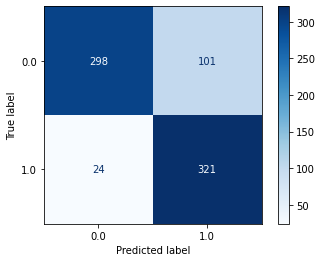

In [269]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##KNN parâmetro 5


In [270]:
kn_n = KNeighborsClassifier(leaf_size=30,
                            algorithm='brute')
kn_n.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [271]:
y_prev_knn = kn_n.predict(x_test)
y_prev_knn

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

###Métricas

Acurácia

In [272]:
accuracy_score(y_test, y_prev_knn)

0.831989247311828

Precisão

In [273]:
precision_score(y_test, y_prev_knn)

0.7606635071090048

Recall

In [274]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Random Forest

##Random Forest PARAMETRO 1

In [275]:
avd = RandomForestClassifier(criterion='entropy',max_features='sqrt', random_state=42)
avd.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [276]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Metricas

In [277]:
accuracy_score(y_test, y_pred_avd)

0.8897849462365591

In [278]:
precision_score(y_test, y_pred_avd)

0.8544474393530997

In [279]:
recall_score(y_test, y_pred_avd)

0.9188405797101449

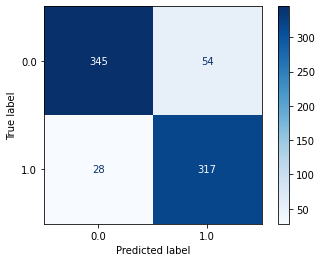

In [280]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##Random Forest PARAMETRO 2

In [281]:
avd = RandomForestClassifier(criterion='gini', random_state=42)
avd.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [282]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.

###Metricas

In [283]:
accuracy_score(y_test, y_pred_avd)

0.8951612903225806

In [284]:
precision_score(y_test, y_pred_avd)

0.8677685950413223

In [285]:
recall_score(y_test, y_pred_avd)

0.9130434782608695

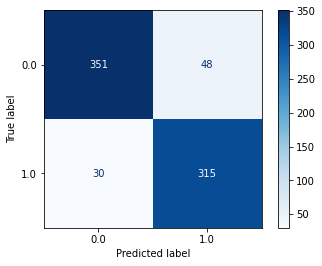

In [286]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

In [287]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [288]:
y_pred_rdf = rdf.predict(x_test)

##Random Forest PARÂMETRO 3

In [289]:
avd = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=42)
avd.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [290]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Metricas

In [291]:
accuracy_score(y_test, y_pred_avd)

0.8897849462365591

In [292]:
precision_score(y_test, y_pred_avd)

0.8544474393530997

In [293]:
recall_score(y_test, y_pred_avd)

0.9188405797101449

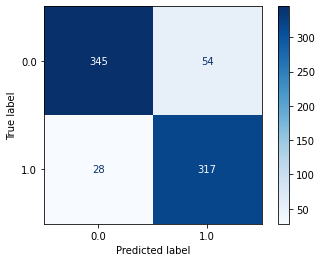

In [294]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

In [295]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [296]:
y_pred_rdf = rdf.predict(x_test)

##Random Forest PARÂMETRO 4

In [297]:
avd = RandomForestClassifier(criterion='entropy', max_features='sqrt', random_state=42)
avd.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [298]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Metricas

In [299]:
accuracy_score(y_test, y_pred_avd)

0.8897849462365591

In [300]:
precision_score(y_test, y_pred_avd)

0.8544474393530997

In [301]:
recall_score(y_test, y_pred_avd)

0.9188405797101449

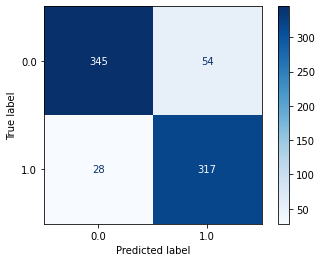

In [302]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

In [303]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [304]:
y_pred_rdf = rdf.predict(x_test)

##Random Forest PARÂMETRO 5

In [305]:
avd = RandomForestClassifier(criterion='entropy', max_features='log2', random_state=42)
avd.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [306]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Metricas

In [307]:
accuracy_score(y_test, y_pred_avd)

0.8897849462365591

In [308]:
precision_score(y_test, y_pred_avd)

0.8544474393530997

In [309]:
recall_score(y_test, y_pred_avd)

0.9188405797101449

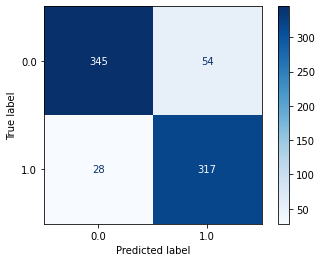

In [310]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

In [311]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [312]:
y_pred_rdf = rdf.predict(x_test)

#Grid search e randomize search

##KNN

In [313]:
from sklearn.neighbors import KNeighborsClassifier

###GridSearch

In [314]:
parametros = {'n_neighbors': [3, 5, 7, 9, 13],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [15, 30]}


grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30], 'n_neighbors': [3, 5, 7, 9, 13],
                         'weights': ['uniform', 'distance']})

In [315]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.861373397843986
{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 3, 'weights': 'distance'}


In [316]:
knn_best = grid_search.best_estimator_
knn_best

KNeighborsClassifier(leaf_size=15, n_neighbors=3, weights='distance')

In [317]:
from sklearn.metrics import f1_score
y_pred = knn_best.predict(x_test)
print('Acc treino: ', knn_best.score(x_train, y_train ))
print('Acc teste: ', knn_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.8629032258064516
Revocação:  0.9449275362318841
Precisão:  0.7970660146699267
F1_score:  0.8647214854111406


###RandomizedSearchCV

In [318]:
parametros = {'n_neighbors': [3, 5, 7, 9, 13, 15, 17, 21, 23, 25, 27, 29, 31, 33],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [7, 15, 30, 45, 60, 75]}
random_search = RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [7, 15, 30, 45, 60, 75],
                                        'n_neighbors': [3, 5, 7, 9, 13, 15, 17,
                                                        21, 23, 25, 27, 29, 31,
                                                        33],
                                        'weights': ['uniform', 'distance']})

In [319]:
print(random_search.best_score_)
print(random_search.best_params_)

0.861373397843986
{'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 75, 'algorithm': 'brute'}


In [320]:
knn_best = random_search.best_estimator_
knn_best

KNeighborsClassifier(algorithm='brute', leaf_size=75, n_neighbors=3,
                     weights='distance')

In [321]:
y_pred = knn_best.predict(x_test)
print('Acc treino: ', knn_best.score(x_train, y_train ))
print('Acc teste: ', knn_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.8629032258064516
Revocação:  0.9449275362318841
Precisão:  0.7970660146699267
F1_score:  0.8647214854111406


##Árvore de Decisão

###GridSearch

In [322]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random']}


grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [323]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8603599015363722
{'criterion': 'gini', 'splitter': 'best'}


In [324]:
avd_best = grid_search.best_estimator_
avd_best

DecisionTreeClassifier()

In [325]:
y_pred = avd_best.predict(x_test)
print('Acc treino: ', avd_best.score(x_train, y_train ))
print('Acc teste: ', avd_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.8602150537634409
Revocação:  0.8753623188405797
Precisão:  0.8319559228650137
F1_score:  0.8531073446327683


###RandomizedSearchCV

In [326]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_neighbors': [33],
              'random_state': 42,
              'return_train_score': True,
              'error_score': 'numeric'}
random_search = RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())

TypeError: ignored

In [ ]:
print(random_search.best_score_)
print(random_search.best_params_)

In [ ]:
avd_best = random_search.best_estimator_
avd_best

In [ ]:
y_pred = avd_best.predict(x_test)
print('Acc treino: ', avd_best.score(x_train, y_train ))
print('Acc teste: ', avd_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

##Random Forest

###GridSearch

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40],
              'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10,20,30]}



grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_train, y_train.squeeze())

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
knn_best = grid_search.best_estimator_
knn_best

In [ ]:
y_pred = knn_best.predict(x_test)
print('Acc treino: ', knn_best.score(x_train, y_train ))
print('Acc teste: ', knn_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

###RandomSearch

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40, 60, 80, 100],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}

random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())

In [ ]:
print(random_search.best_score_)
print(random_search.best_params_)

In [ ]:
rdf_best = random_search.best_estimator_
rdf_best

In [ ]:
y_pred = rdf_best.predict(x_test)
print('Acc treino: ', rdf_best.score(x_train, y_train ))
print('Acc teste: ', rdf_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))